### 1.Import

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

1.1 Models

In [28]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes (Gaussian)': GaussianNB(),
    # 'Naive Bayes (Multinomial)': MultinomialNB(),
    'Naive Bayes (Bernoulli)': BernoulliNB(),
    # 'KNN': KNeighborsClassifier(),
    # 'Decision Tree': DecisionTreeClassifier(random_state=42),
    # 'Random Forest': RandomForestClassifier(random_state=42),
    # 'SVM': SVC(random_state=42)
}

### 2.Load dataset

In [29]:
path=r"C:\Users\mrtat\Downloads\NTI\Data\mushrooms.csv"

In [30]:
df = pd.read_csv(path)

2.1.Show Data

In [31]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [32]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [33]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### 3.Preprocessing

3.1Handle missing values

In [35]:
df.isna().sum().sort_values(ascending=False)

class                       0
stalk-surface-above-ring    0
population                  0
spore-print-color           0
ring-type                   0
ring-number                 0
veil-color                  0
veil-type                   0
stalk-color-below-ring      0
stalk-color-above-ring      0
stalk-surface-below-ring    0
stalk-root                  0
cap-shape                   0
stalk-shape                 0
gill-color                  0
gill-size                   0
gill-spacing                0
gill-attachment             0
odor                        0
bruises                     0
cap-color                   0
cap-surface                 0
habitat                     0
dtype: int64

3.2 Handle duplicated

In [36]:
df.duplicated().sum()

0

In [37]:
df.shape

(8124, 23)

3.3 Label Encode to all data

In [38]:
lb=LabelEncoder()
for col in df.columns:
    df[col] = lb.fit_transform(df[col])

4.1 Data before balance

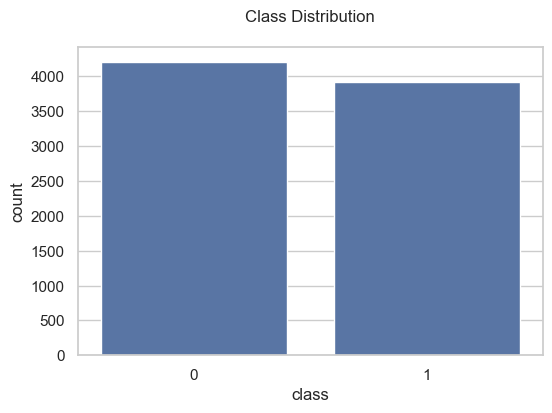

In [39]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df)
plt.title('Class Distribution\n')
plt.show()

In [40]:
print(df['class'].value_counts())
print(df['class'].value_counts(normalize=True))  # Shows percentages

class
0    4208
1    3916
Name: count, dtype: int64
class
0    0.517971
1    0.482029
Name: proportion, dtype: float64


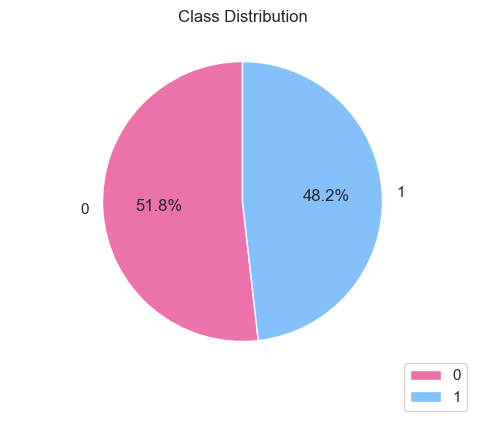

In [41]:
revenue_counts = df['class'].value_counts()
revenue_counts.plot(
    kind='pie',
    figsize=(6, 4),
    autopct='%1.1f%%',   # add in percentages
    startangle=90,       # start angle 90°   
    colors=["#eb72aa","#84c0fc"],  # Custom colors for the pie chart    
)

plt.title('Class Distribution\n')
plt.axis('equal')  # Sets the pie chart to look like a circle.
plt.legend(labels=revenue_counts.index, bbox_to_anchor=(1, 0))
plt.ylabel('')  # Hide y-label
plt.show()

In [42]:
x = df.drop('class', axis=1)
y = df['class']

3.3 Split data

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [44]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### 4.Visulization

### 5.Train model

In [45]:
results = {}
# models from 1.1 part
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }

In [46]:
metrics_df = pd.DataFrame(results).T
metrics_df.index.name = 'Model'
print("\nPerformance Metrics:\n", metrics_df)


Performance Metrics:
                          Accuracy  Precision    Recall  F1-Score
Model                                                           
Logistic Regression      0.952000   0.944444  0.956522  0.950445
Naive Bayes (Gaussian)   0.921846   0.909887  0.929668  0.919671
Naive Bayes (Bernoulli)  0.895385   0.960843  0.815857  0.882434


In [47]:
best_model_name = metrics_df['F1-Score'].idxmax()
best_model = models[best_model_name]
print(f"\nBest Model based on F1-Score: {best_model_name}\n")


Best Model based on F1-Score: Logistic Regression



### confusion Matrix & Classification Report for Best Model

In [48]:
y_pred_best = best_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred_best)

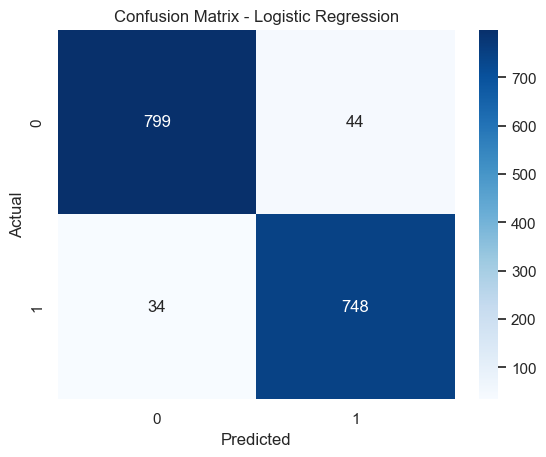

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       843
           1       0.94      0.96      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



In [49]:
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_best))